# Task 1: Unsupervised learning, PCA of NIR data

### 3.2.A) Generate the plot of all the training set raw NIR data.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


train = pd.read_excel('sawdust_train.xlsx')
train.head()

,Primary ID,OBSNAM,w1100,w1101,w1102,w1103,w1104,w1105,w1106,w1107,...,w2294,w2295,w2296,w2297,w2298,w2299,w2300,Spruce,Pine,Birch
0,1,02a,1.83444,1.83416,1.83350,1.83237,1.83084,1.82910,1.82742,1.82611,...,0.568213,0.572867,0.577625,0.582679,0.587850,0.593058,0.598025,0.00,100.00,0.00
1,2,02b,1.82992,1.82965,1.82902,1.82800,1.82667,1.82501,1.82347,1.82225,...,0.566549,0.571178,0.575774,0.580471,0.585226,0.589929,0.594470,0.00,100.00,0.00
2,5,15a,1.84602,1.84569,1.84522,1.84431,1.84311,1.84172,1.84035,1.83918,...,0.561938,0.566829,0.571796,0.577128,0.582482,0.587653,0.592419,33.33,33.33,33.33
3,6,15b,1.84556,1.84514,1.84444,1.84340,1.84206,1.84054,1.83912,1.83795,...,0.563561,0.568268,0.572794,0.577536,0.582409,0.587451,0.592277,33.33,33.33,33.33
4,9,08a,1.83770,1.83723,1.83646,1.83532,1.83385,1.83222,1.83070,1.82958,...,0.563027,0.567910,0.572684,0.577522,0.582369,0.587133,0.591635,0.00,66.65,33.35


<AxesSubplot:title={'center':'Raw NIR data of 30 data points (lines)'}, xlabel='Wavelength', ylabel='Signal'>

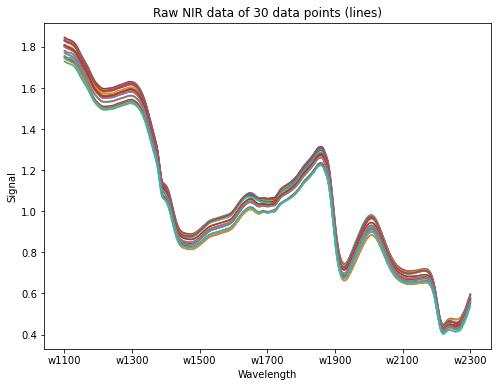

In [2]:
train_spectra=train.iloc[:,2:1203]
train_spectra.transpose().plot(legend=None,figsize=(8,6),title='Raw NIR data of 30 data points (lines)',
                       xlabel='Wavelength',
                       ylabel='Signal')   #every wav line: every row

### 3.2.B) Pre-process the NIR data and perform PCA for 5 components.

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#Spectral inputs are pre-processed (mean-centered) and fit to a 2 principal components model
scaler = StandardScaler(with_std=False)
train_spectra_scaled = scaler.fit_transform(train_spectra)

pca = PCA(n_components=5, svd_solver='full')     #perform PCA with 5 principal components.
PC_scores_train = pca.fit_transform(train_spectra_scaled)  

In [4]:
scores_train = pd.DataFrame(data = PC_scores_train,columns = ['PC1', 'PC2', 'PC3','PC4','PC5'])
scores_train 

,PC1,PC2,PC3,PC4,PC5
0,-1.078295,-0.047001,0.251280,0.024857,0.003036
1,-0.929153,-0.060230,0.245587,0.000213,-0.003432
2,-1.022756,-0.305001,-0.042607,0.020161,-0.021894
3,-1.019964,-0.295982,-0.037858,0.021896,-0.026418
4,-1.184856,-0.018965,0.083824,-0.021246,-0.009141
5,-1.095564,0.004305,0.085434,-0.023682,-0.008591
6,-0.429080,0.383454,-0.016684,0.107723,-0.004963
7,-0.482592,0.379079,-0.008178,0.101704,-0.004043
8,0.070632,-0.290886,-0.044821,0.048580,-0.003262
9,0.198855,-0.264795,-0.043709,0.049472,-0.002781


In [5]:
loadings_train = pd.DataFrame(data = pca.components_.T,columns = ['PC1', 'PC2', 'PC3','PC4','PC5'],
                           index = train_spectra.columns)
loadings_train 

,PC1,PC2,PC3,PC4,PC5
w1100,-0.034221,-0.065116,0.005665,-0.036834,0.034033
w1101,-0.034276,-0.064894,0.005843,-0.036801,0.029723
w1102,-0.034303,-0.064643,0.005948,-0.037266,0.025164
w1103,-0.034311,-0.064478,0.006022,-0.037800,0.022163
w1104,-0.034327,-0.064430,0.005969,-0.038608,0.021055
...,...,...,...,...,...
w2296,-0.017195,-0.007921,0.029052,0.075289,-0.059924
w2297,-0.017148,-0.007882,0.028378,0.076721,-0.057624
w2298,-0.017126,-0.007856,0.028030,0.078477,-0.056627
w2299,-0.017170,-0.007917,0.027927,0.080656,-0.059458


### 3.2.C) Plot the cumulative explained variance versus the number of components. How many components do we need to capture 99% of the variance?

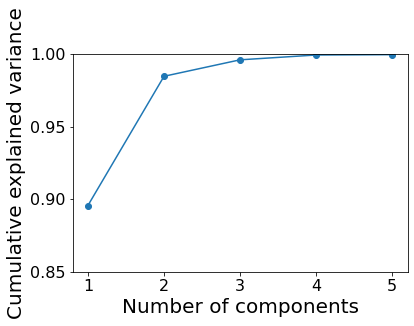

The first 1 component(s) describe 89.5578452799401% of the variance.
The first 2 component(s) describe 98.47237862237338% of the variance.
The first 3 component(s) describe 99.6083003486981% of the variance.
The first 4 component(s) describe 99.94145207024461% of the variance.
The first 5 component(s) describe 99.9639693079612% of the variance.


In [6]:
import numpy as np
plt.plot(range(1,pca.n_components+1), np.cumsum(pca.explained_variance_ratio_),'-o')
plt.xlabel('Number of components', fontsize=20)
plt.ylabel('Cumulative explained variance', fontsize=20);
plt.tick_params(labelsize=16)
plt.ylim(0.85,1)
plt.show()
for i in range(5):
    print("The first {} component(s) describe {}% of the variance.".format(i+1,np.cumsum(pca.explained_variance_ratio_)[i]*100))

#### So, we need 3 components to capture 99% of the variance.

### 3.2.D)  Plot the PCA scores for the first two components. 

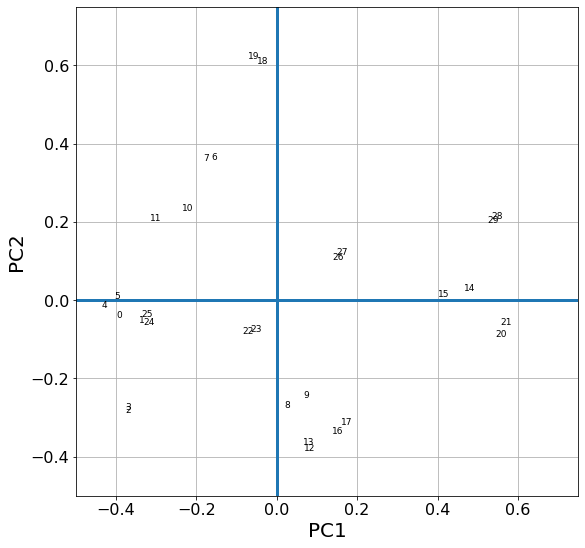

In [7]:
def score_plot(scores, score_labels=None):
    # adjusting the scores to fit in (-1,1)
    xt = scores[:,0]
    yt = scores[:,1]
    scalext = 1.0/(xt.max() - xt.min())
    scaleyt = 1.0/(yt.max() - yt.min())
    xt_scaled = xt * scalext
    yt_scaled = yt * scaleyt
    
    fig = plt.figure(figsize=(9, 9))
    for (x,y), label in zip(np.vstack((xt_scaled, yt_scaled)).T, score_labels):
        plt.text(x, y, label, ha='center', size=9)
        
    plt.hlines(0, -1, 1, linestyles='solid', linewidth=3)
    plt.vlines(0, -1, 1, linestyles='solid', linewidth=3)
    
    plt.xlim(-0.5,0.75)
    plt.ylim(-0.5,0.75)
    plt.xlabel("PC{}".format(1), fontsize=20);
    plt.ylabel("PC{}".format(2), fontsize=20);
    plt.tick_params(labelsize=16)
    plt.grid()
    
score_plot(PC_scores_train[:,:2], score_labels=scores_train.index)
plt.show()

### Any outliers, trends, or clusters? 

* No obvious outliers. But 19,18, 29, 28,21,20,14 may be considered as outliers.
* no obvious trend or clusters as they seems to be evenly scatterd about the origin.





### 3.2.E) Plot the loadings of the first two components.

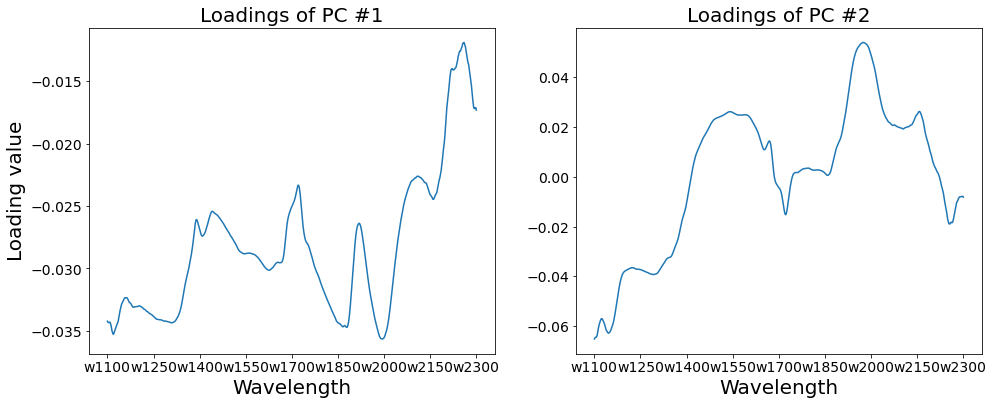

In [9]:
from matplotlib.ticker import MaxNLocator

fig0 = plt.figure(figsize=(16, 6))
sub1 = fig0.add_subplot(121)
plt.plot(loadings_train['PC1'],'-')
sub1.set_xlabel('Wavelength', fontsize=20)
sub1.set_ylabel('Loading value', fontsize=20)
sub1.set_title('Loadings of PC #1', fontsize=20)
sub1.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.tick_params(labelsize=14)

sub2 = fig0.add_subplot(122)
plt.plot(loadings_train['PC2'],'-')
sub2.set_xlabel('Wavelength', fontsize=20)
sub2.set_title('Loadings of PC #2', fontsize=20)
sub2.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.tick_params(labelsize=14)

plt.show()

### Comment on which wavelengths seem to be important for different PCs. Don’t describe the graphs in words. In two sentences, describe any significant trends or signals (if any).

The first PC captures predominantly information from the wavelengths that corresponds to w2150 and w2300.

PC2 captures information from the wavelengths between w1850 and w2300.


### 3.2.F) Apply the dimensionality reduction with the PCA model you developed in step B for the test set using the transform method.

In [10]:
test = pd.read_excel('sawdust_pred.xlsx')
test_spectra = test.iloc[:,2:1203]
test_spectra_scaled = scaler.fit_transform(test_spectra)
PC_scores_test = pca.fit_transform(test_spectra_scaled) 

scores_test = pd.DataFrame(data = PC_scores_test,columns = ['PC1', 'PC2', 'PC3','PC4','PC5'])
scores_test

,PC1,PC2,PC3,PC4,PC5
0,1.307167,-0.116739,0.019663,-0.011489,0.042792
1,1.295767,-0.082817,0.045996,-0.019569,0.049907
2,0.045929,0.312981,-0.075174,-0.024855,0.019280
3,-0.100166,0.282512,-0.080612,-0.021303,0.026089
4,-0.238445,0.106215,0.067848,-0.000860,0.029368
5,-0.347892,0.062116,0.054608,0.004865,0.034243
6,0.777212,0.081381,-0.034592,-0.012591,-0.022065
7,0.846563,0.051527,-0.048657,-0.006842,-0.026525
8,-0.059730,0.124504,0.088213,0.051086,-0.013622
9,0.083478,0.128492,0.098061,0.059624,-0.018701


In [11]:
loadings_test = pd.DataFrame(data = pca.components_.T,columns = ['PC1', 'PC2', 'PC3','PC4','PC5'],
                           index = test_spectra.columns)
loadings_test 

,PC1,PC2,PC3,PC4,PC5
w1100,0.036745,0.054166,0.039793,-0.000688,-0.009502
w1101,0.036743,0.054370,0.039220,-0.001193,-0.008820
w1102,0.036739,0.054342,0.038570,-0.001731,-0.008647
w1103,0.036761,0.054258,0.038005,-0.002057,-0.008098
w1104,0.036822,0.054027,0.037770,-0.002298,-0.007187
...,...,...,...,...,...
w2296,0.018198,0.033278,-0.069209,0.032679,0.081565
w2297,0.018311,0.033154,-0.072118,0.029609,0.075845
w2298,0.018468,0.032889,-0.074372,0.026279,0.070583
w2299,0.018678,0.032797,-0.076770,0.024036,0.068503


### 3.2.G) Create a scatter plot of the scores in PC1, PC2 of all 54 points in the train and test data set, coloured by the set they belong to (suggestion: use sns.scatterplot). 

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

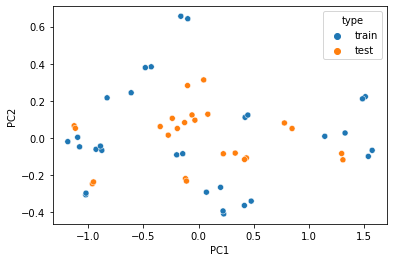

In [12]:
import seaborn as sns
pd.options.mode.chained_assignment = None

train_xy=scores_train.iloc[:,:2]
train_xy['type']=['train']*30
test_xy=scores_test.iloc[:,:2]
test_xy['type']=['test']*24
all_xy=pd.concat([train_xy,test_xy])
train_xy
sns.scatterplot(data=all_xy,x='PC1',y='PC2',hue='type')

#### Why is it important to overlap the scores of both train and test set in one graph? What are you checking to see?

We could clearly see how the scores of test data locate around the socre of train data to determine whether the sample of the test set are similar with the train set, or we say we can observe if the test set is biased. The potential outliers for both set may be obvious as well.

Correlated sample are clustered together. But there is no obvious cluster, and the train and test data are similar.

# Task 2: Supervised learning, PLS model

### 3.3.A Run the PLS regression to model all 3 outputs with the scaled train set spectra. Increase the number of components to achieve R2 value of at least 0.92 (use PLSRe- gression’s method score to estimate R2).

In [13]:
from sklearn.cross_decomposition import PLSRegression

X_train = train_spectra_scaled                 #scaled train set spectra
y_train = train.iloc[:,-3:]     #Spruce,Pine, Birch in train set

for i in np.arange(1,5):
    pls_sklearn = PLSRegression(n_components=i, scale=False)
    pls_sklearn.fit(X_train, y_train)
    print("When number of components = {}, R2 value is {}.".format(i, pls_sklearn.score(X_train,y_train)))

When number of components = 1, R2 value is 0.20163524419160375.
When number of components = 2, R2 value is 0.46520500270197146.
When number of components = 3, R2 value is 0.9240392024759805.
When number of components = 4, R2 value is 0.9790465508514917.


#### We have to use 3 components to achive R2 value of at least 0.92.

### 3.3.B  Predict the output values for the inputs in the test set and compare them by plotting the 24 actual vs predicted values in a 1x3 subplot (for spruce, pine and birch, respectively). Also, include the y=x line for reference.

In [14]:
pls_sklearn_3 = PLSRegression(n_components=3, scale=False)
pls_sklearn_3.fit(X_train, y_train)     #pls with 3 components

X_test = test_spectra_scaled  
y_test = test.iloc[:,-3:]
y_test_predicted = pls_sklearn_3.predict(X_test)  #predicted y

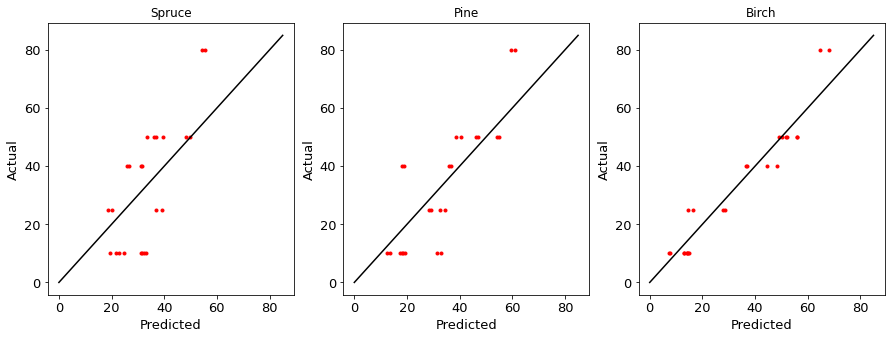

In [15]:
fig, axes = plt.subplots(1,3,figsize=(15,5))   #1*3 subplot
for i in range(0,3):
    plt.subplot(1, 3, i+1)
    plt.scatter(y_test_predicted[:,i], y_test.iloc[:,i],marker=".",color='r')
    plt.plot([0, 85], [0, 85],color='black')
    plt.xlabel('Predicted', fontsize = 13)
    plt.ylabel('Actual', fontsize = 13)
    plt.tick_params(labelsize=13)
    plt.title(y_test.columns[i])
plt.show()